# **Standardized Indices (SI)**
**Tolga Barış Terzi - 2025**

This notebook demonstrates example calculations of **Standardized Indices** (SI) using the **SPI methodology** (McKee 1973).  
These indices can be applied to various hydrometeorological variables:

- **Standardized Precipitation Index (SPI)**
- **Standardized Streamflow Index (SSFI)**
- **Standardized Soil Moisture Index (SSMI)**
- **Standardized Precipitation Evapotranspiration Index (SPEI)**
- **Standardized Groundwater Index (SGI)**

---

## **SPI Methodology Overview**
The SPI methodology can be summarized in the following steps:

1. **Aggregation**: Accumulate the selected data over the chosen time scale.
2. **Distribution selection**: Identify the best-fit probability distribution for the accumulated data.
3. **Distribution fitting**: Fit the selected probability distribution to the data.
4. **CDF calculation**: Use the cumulative distribution function (CDF) of the fitted distribution to determine cumulative probabilities.
5. **Standardization**: Transform cumulative probabilities to standard normal quantiles (mean 0, variance 1).

---

## **Required Packages**

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:

- **Streamflow**  
- **Precipitation**  
- **Minimum Temperature**  
- **Maximum Temperature**  
- **Mean Temperature**
- **Potential Evapotranspiration**

The data is from the **Seyhan River Basin, Turkey**, covering the period **October 1964 – September 2011**, which corresponds to hydrological years **1965–2011**.

In [4]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


---
## **Calculate Standardized Indices**
---
### **Calculate Parametric SPI**

For this example, we will use **precipitation data** to calculate parametric SPI.  
Other variables (streamflow, soil moisture, groundwater, or water balance) can be used to calculate other indices such as SSFI, SSMI, SGI, or SPEI.

It is common to calculate drought indices at different **time scales**: 1, 3, 6, 9, and 12 months.  

In this example, we will calculate:

- **SPI-12 (parametric)** using a 3-parameter Gamma distribution.


=== Parametric SPI-12 (Gamma) ===


,Index,CDF
DATE,,
1965-09-01,-0.196276,0.422197
1965-10-01,-0.064632,0.474233
1965-11-01,-0.444248,0.328432
1965-12-01,0.361310,0.641066
1966-01-01,1.469601,0.929165


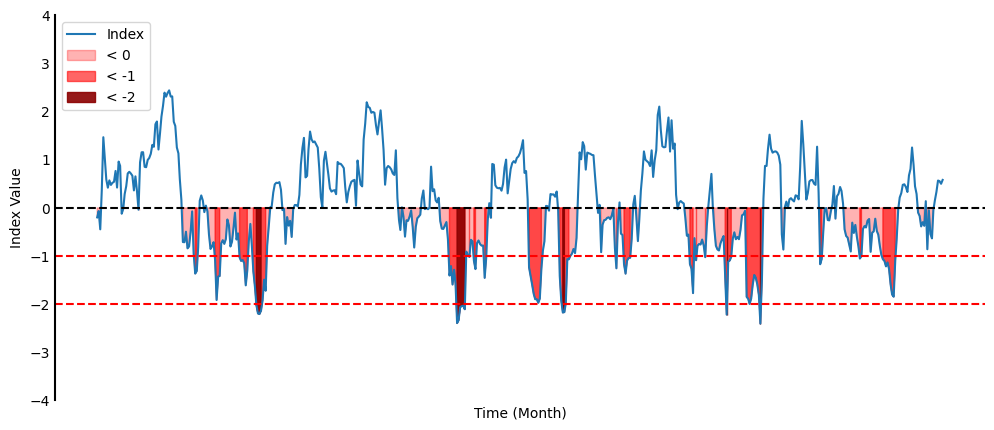

In [5]:
# Select precipitation column
precip = df['PRECIPITATION']

# Create SI class using the data and the time scale
spi_12 = pydrght.SI(data=precip, ts=12)

# === Parametric SPI-12 using Gamma distribution ===
spi_12_param = spi_12.fit_parametric(stats.gamma, is_2p=False)

print("=== Parametric SPI-12 (Gamma) ===")
display(spi_12_param.head())

pydrght.utils.plot_index_with_severity(spi_12_param["Index"])

---
### **Calculate Empirical SPI**

For this example, we will use **precipitation data** to calculate empirical SPI.  
Other variables (streamflow, soil moisture, groundwater, or water balance) can be used to calculate other indices such as SSFI, SSMI, SGI, or SPEI.

It is common to calculate drought indices at different **time scales**: 1, 3, 6, 9, and 12 months.  

In this example, we will calculate:

- **SPI-12 (empirical)** using a Gringorten Plotting Position Formula.

Note: The Weibull distribution could also be used instead of Gringorten for empirical SPI calculation.



=== Empirical SPIe-12 (Gringorten) ===


,Index,CDF
DATE,,
1965-09-01,-0.214419,0.415110
1965-10-01,-0.191387,0.424111
1965-11-01,-0.360964,0.359063
1965-12-01,0.419622,0.662619
1966-01-01,1.593649,0.944493


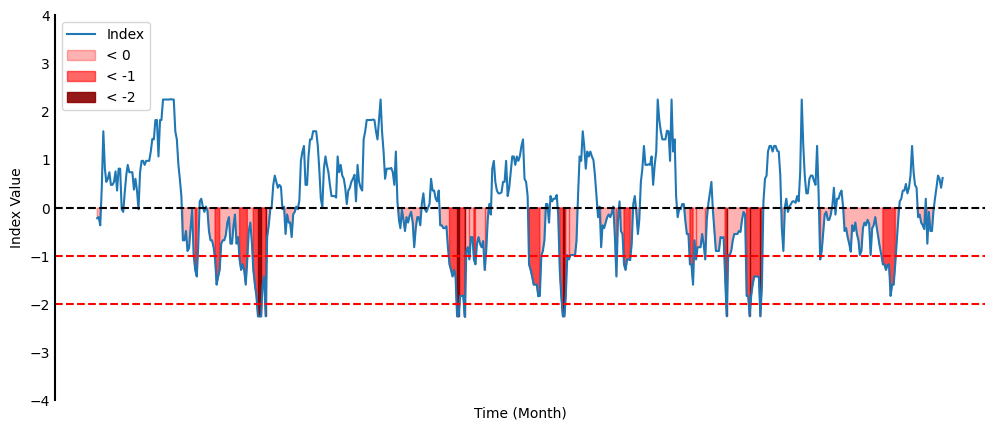

In [6]:
# Select precipitation column
precip = df['PRECIPITATION']

# Create SI class using the data and the time scale
spi_12 = pydrght.SI(data=precip, ts=12)

# === Parametric SPI-12 using Gamma distribution ===
spi_12_emp = spi_12.fit_empirical(method='Gringorten')

print("\n=== Empirical SPIe-12 (Gringorten) ===")
display(spi_12_emp.head())

pydrght.utils.plot_index_with_severity(spi_12_emp["Index"])

---
### **Calculate Parametric SSFI**

For this example, we will use **streamflow data** to calculate SSFI.  
Other variables (streamflow, soil moisture, groundwater, or water balance) can be used to calculate other indices such as SPI, SSMI, SGI, or SPEI.

It is common to calculate drought indices at different **time scales**: 1, 3, 6, 9, and 12 months.  

In this example, we will calculate:

- **SSFI-12 (parametric)** using a 2-parameter Log-normal distribution.


=== Parametric SSFI-12 (Log-normal) ===


,Index,CDF
DATE,,
1965-09-01,-0.153698,0.438924
1965-10-01,-0.118219,0.452947
1965-11-01,-0.095564,0.461933
1965-12-01,0.017739,0.507077
1966-01-01,0.723140,0.765203


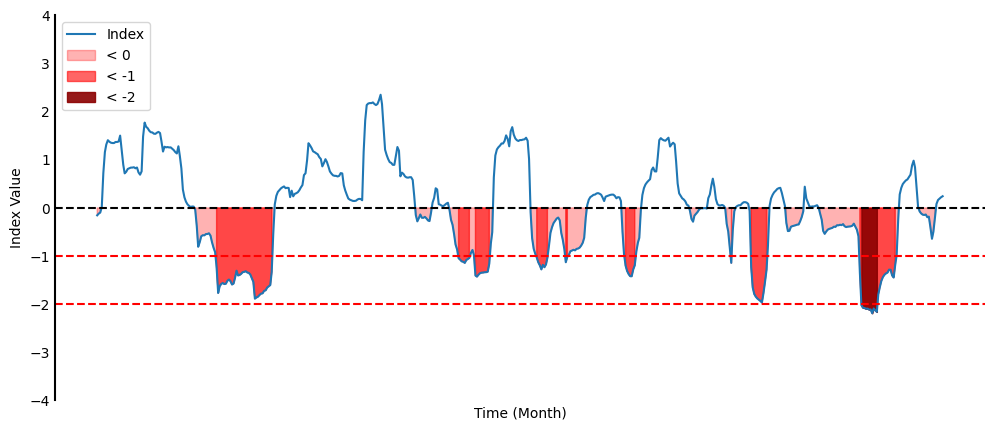

In [7]:
# Select streamflow column
streamflow = df['STREAMFLOW']

# Create SI class using the data and the time scale
ssfi_12 = pydrght.SI(data=streamflow, ts=12)

# === Parametric SSFI-12 using Log-normal distribution ===
ssfi_12_param = ssfi_12.fit_parametric(stats.lognorm, is_2p=True)

print("\n=== Parametric SSFI-12 (Log-normal) ===")
display(ssfi_12_param.head())

pydrght.utils.plot_index_with_severity(ssfi_12_param["Index"])

---
### **Calculate SPEI Using the `SPEI` Subclass**

Besides computing standardized indices through the general `SI` class, SPEI can be calculated directly using the dedicated **`SPEI` subclass**, which provides a streamlined interface for parametric and empirical estimation.

By default, `SPEI` uses:

- **UB-PWM estimation** (`fit_parametric_pwm`)
- **Generalized Logistic distribution**

When using UB-PWM, the distribution may be changed to **gam** or **pe3**.  
For full flexibility, any continuous distribution from `scipy.stats` can be used through the generic `fit_parametric` method.  
Alternatively, SPEI can be computed non-parametrically using **empirical PDFs** via `fit_empirical`.

This design allows SPEI to be estimated under different statistical assumptions with minimal changes to the workflow.


,Index,CDF
11,-0.681458,0.247791
12,-0.312624,0.377283
13,-0.608407,0.271459
14,0.164136,0.565188
15,1.279659,0.899668
...,...,...
559,-0.147578,0.441338
560,0.108766,0.543306
561,0.086532,0.534478
562,0.093607,0.537289


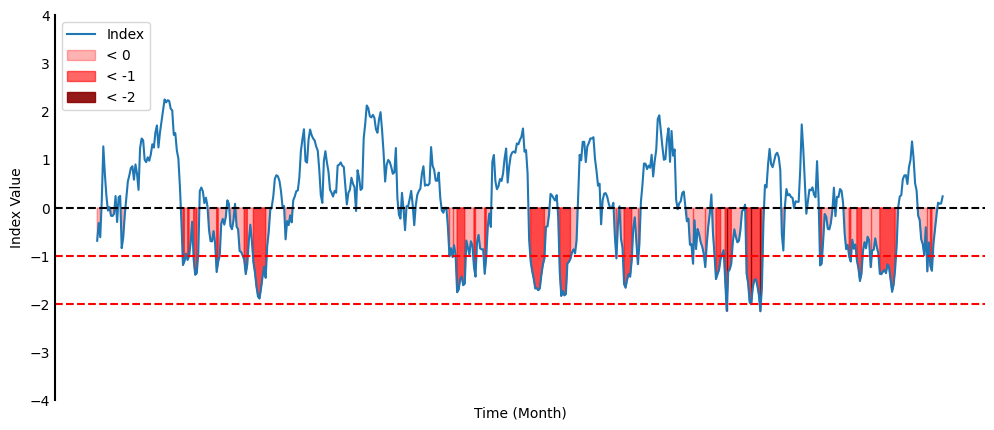

In [8]:
df = pd.read_csv("data.csv",parse_dates=False)

df["PRECIPITATION"] = pd.to_numeric(df["PRECIPITATION"], errors="coerce")
df["PET"] = pd.to_numeric(df["PET"], errors="coerce")

water_balance = df["PRECIPITATION"] - df["PET"]
water_balance = water_balance.dropna()

spei_pwm = pydrght.indices.SPEI(data=water_balance, ts=12)
spei_values = spei_pwm.fit()
display(spei_values)

pydrght.utils.plot_index_with_severity(spei_values["Index"])

---
### **Calculate SSMI Using the `SSMI` Subclass from `.nc4` Dataset**

Besides computing standardized indices through the general `SI` class, SSMI can be calculated directly using the dedicated **`SSMI` subclass**, which provides a streamlined interface for parametric and non-parametric estimation from soil moisture data.

By default, `SSMI` uses:

- **Empirical CDF estimation** (`fit_empirical`) — recommended when data may not follow a theoretical distribution.  

In this example, we demonstrate the workflow using **empirical CDFs** on a `.nc4` dataset, showing that **PyDRGHT** can handle soil moisture data from remote sensing or satellite-derived products.

This design allows SSMI to be estimated under different statistical assumptions with minimal changes to the workflow, providing flexibility for drought monitoring based on soil moisture.

,Index,CDF
time,,
1948-12-01,-0.945394,0.172229
1949-01-01,-0.823606,0.205082
1949-02-01,-0.878052,0.189958
1949-03-01,-0.771499,0.220206
1949-04-01,-0.771499,0.220206


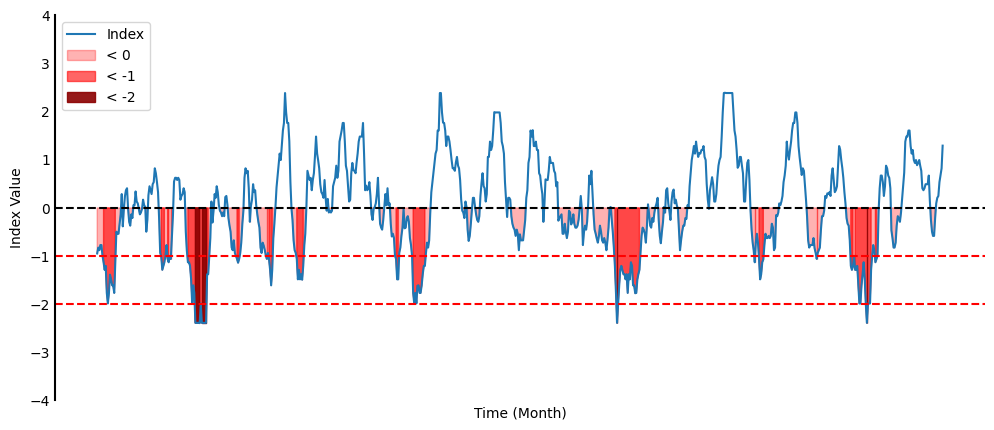

In [9]:
import xarray as xr
import pandas as pd
import pydrght
from pydrght.indices import SSMI

# Load the NetCDF soil moisture dataset
ds = xr.open_dataset("soilmoisture.nc4")

# Select the top 0-10 cm soil moisture layer
soil_moisture = ds['SoilMoi0_10cm_inst'].sel(lat=36.5, lon=29.5).to_series()
soil_moisture.dropna(inplace=True)

ssmi_obj = SSMI(data=soil_moisture, ts=12)

ssmi_values = ssmi_obj.fit_empirical()

display(ssmi_values.head())

pydrght.utils.plot_index_with_severity(ssmi_values["Index"])

---
## **References**

- McKee, T. B., Doesken, N. J., & Kleist, J. (1993). *The Relationship of Drought Frequency and Duration to Time Scales.* Proceedings of the 8th Conference on Applied Climatology, 179–184.

- Vicente-Serrano, S. M., Beguería, S., & López-Moreno, J. I. (2010). *A Multiscalar Drought Index Sensitive to Global Warming: The Standardized Precipitation Evapotranspiration Index.* Journal of Climate, 23(7), 1696–1718.

- Hayes, M., Svoboda, M., Wall, N., & Widhalm, M. (2011). *The Lincoln Declaration on Drought Indices: Universal Meteorological Drought Index Recommended.* Bulletin of the American Meteorological Society, 92(4).

- Gringorten, I. I. (1963). *A plotting rule for extreme probability paper.* Journal of Geophysical Research, 68(3), 813–814.

- Weibull, W. (1939). *A statistical distribution function of wide applicability.* Journal of Applied Mechanics, 18, 293–297.
---
